In [101]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [102]:
%config InlineBackend.figure_format = 'retina'

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [103]:
""" File path change accordingly"""
directoryPath = "Data"

wineData = pd.read_csv(directoryPath+"/winequality-red.csv", sep=";")
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
"""Dropping free sulfur dioxide"""
selectedFeatures = list(wineData)
selectedFeatures.remove('quality')
selectedFeatures.remove('free sulfur dioxide')

## Split data

In [105]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(wineData[selectedFeatures], wineData['quality'],
                                                test_size = 0.2)

print("Train set size " +str(len(xTrain)))
print("Test set size " +str(len(xTest)))

Train set size 1279
Test set size 320


# Nearest Neighbour

## Create a pipeline for classification

In [106]:
classificationPipeline = Pipeline([
    ("featureScaling", StandardScaler()),
    ("classification", KNeighborsClassifier())
])

## Define grid for grid search

In [107]:
parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["brute"]
    
}

## Gridsearch

In [108]:
from sklearn.model_selection import GridSearchCV


modelKNN = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNN.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    5.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['brute'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [109]:
print("Best model " + str(modelKNN.grid_scores_))

Best model [mean: 0.55199, std: 0.02045, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 5}, mean: 0.59812, std: 0.02026, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 5}, mean: 0.56607, std: 0.01866, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 6}, mean: 0.61298, std: 0.02026, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 6}, mean: 0.57232, std: 0.01252, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 7}, mean: 0.61298, std: 0.01762, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 7}, mean: 0.57389, std: 0.01750, params: {'classification__algorithm': 'brute', 'classification

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


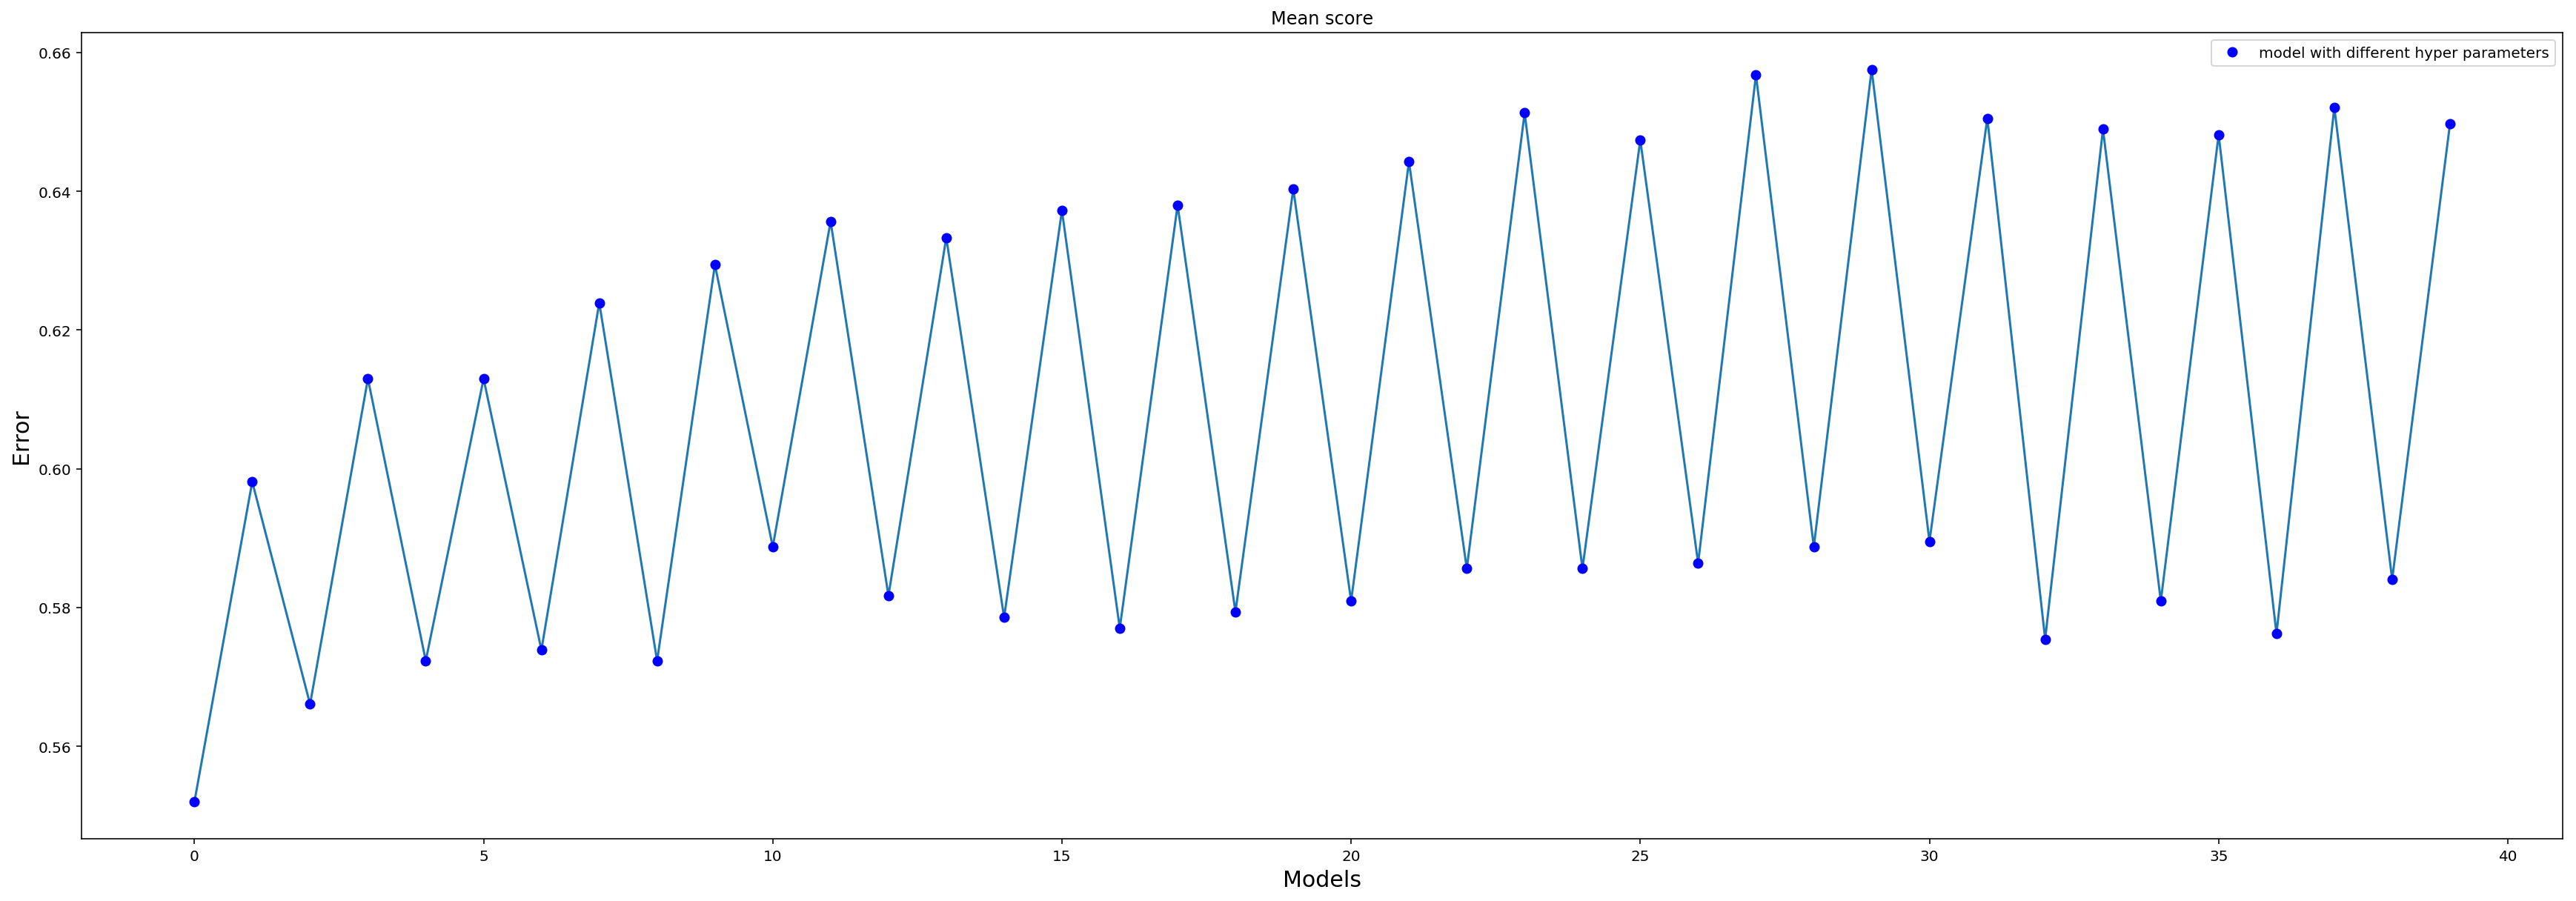

In [110]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNN.cv_results_["mean_test_score"])
plt.plot(modelKNN.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

# KDTree
It is a space partioning algorithm for KNN. Optimizes the algorithm by reducing the search area for algorithm
<br>
    function kdtree (list of points pointList, int depth)<br>
{<br>

    // Select axis based on depth so that axis cycles through all valid values
    var int axis := depth mod k;
        
    // Sort point list and choose median as pivot element
    select median by axis from pointList;
        
    // Create node and construct subtree
    node.location := median;
    node.leftChild := kdtree(points in pointList before median, depth+1);
    node.rightChild := kdtree(points in pointList after median, depth+1);
    return node;
}

In [111]:
parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["kd_tree"],
    "classification__leaf_size":[31]
}

## Grid search

In [112]:
modelKNNKDTree = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNNKDTree.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    2.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['kd_tree'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'classification__leaf_size': [31]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [113]:
print("Best model " + str(modelKNNKDTree.grid_scores_))

Best model [mean: 0.55199, std: 0.02045, params: {'classification__algorithm': 'kd_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.59812, std: 0.02026, params: {'classification__algorithm': 'kd_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.56607, std: 0.01866, params: {'classification__algorithm': 'kd_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.61298, std: 0.02026, params: {'classification__algorithm': 'kd_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.57232, std: 0.01252, params: {'classification__algorithm': 'kd_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 7}, mean: 0.61298, std: 0.01762, params: {'classification__algorithm':

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


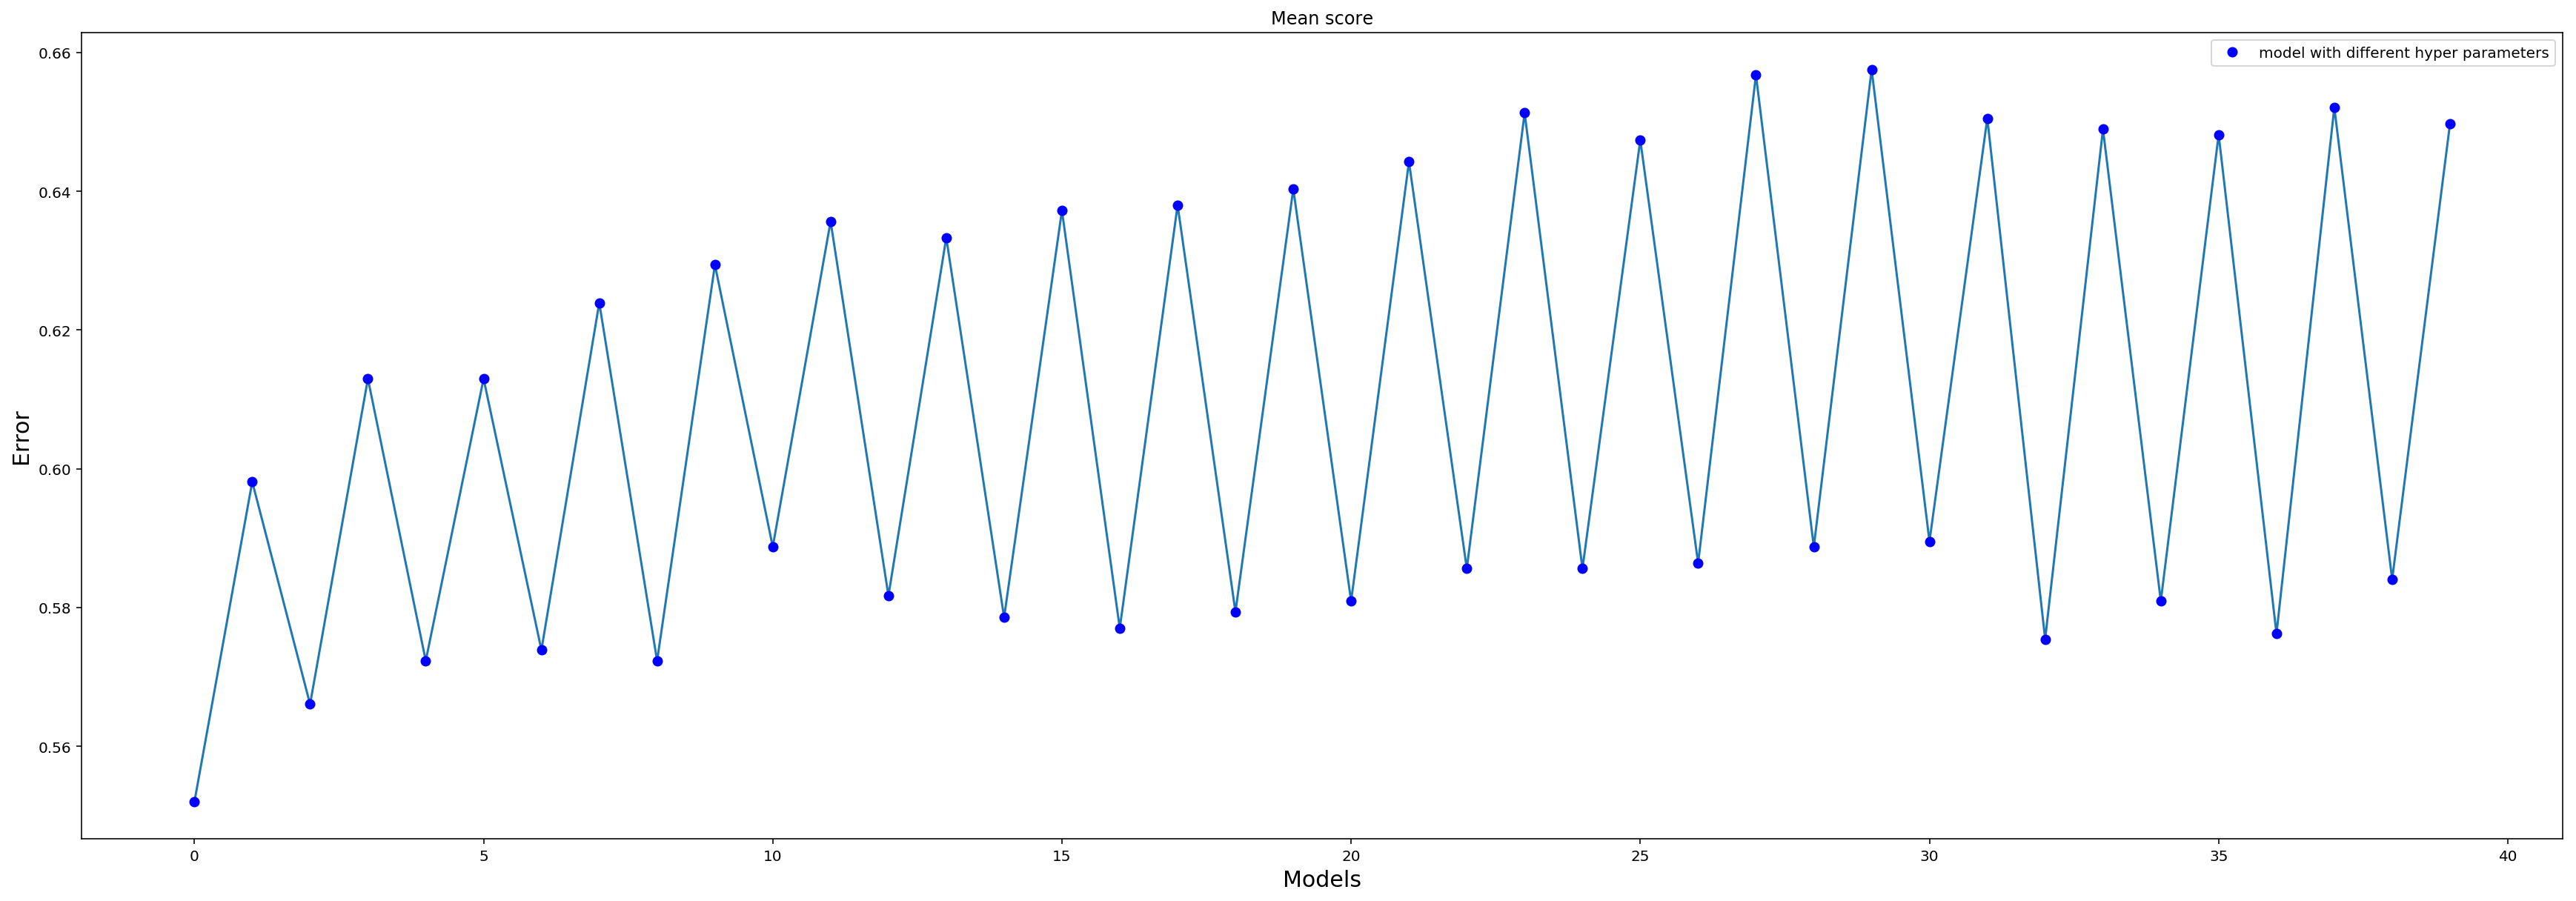

In [114]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNNKDTree.cv_results_["mean_test_score"])
plt.plot(modelKNNKDTree.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

# Ball Tree
It is a space partioning algorithm for KNN. Optimizes the algorithm by reducing the search area for algorithm. It generates hypersphere.

In [115]:
parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["ball_tree"],
    "classification__leaf_size":[31]
}

In [116]:
modelKNNBallTree = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNNBallTree.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['ball_tree'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'classification__leaf_size': [31]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [117]:
print("Best model " + str(modelKNNBallTree.grid_scores_))

Best model [mean: 0.55199, std: 0.02045, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.59812, std: 0.02026, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.56607, std: 0.01866, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.61298, std: 0.02026, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.57232, std: 0.01252, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 7}, mean: 0.61298, std: 0.01762, params: {'classification__a

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


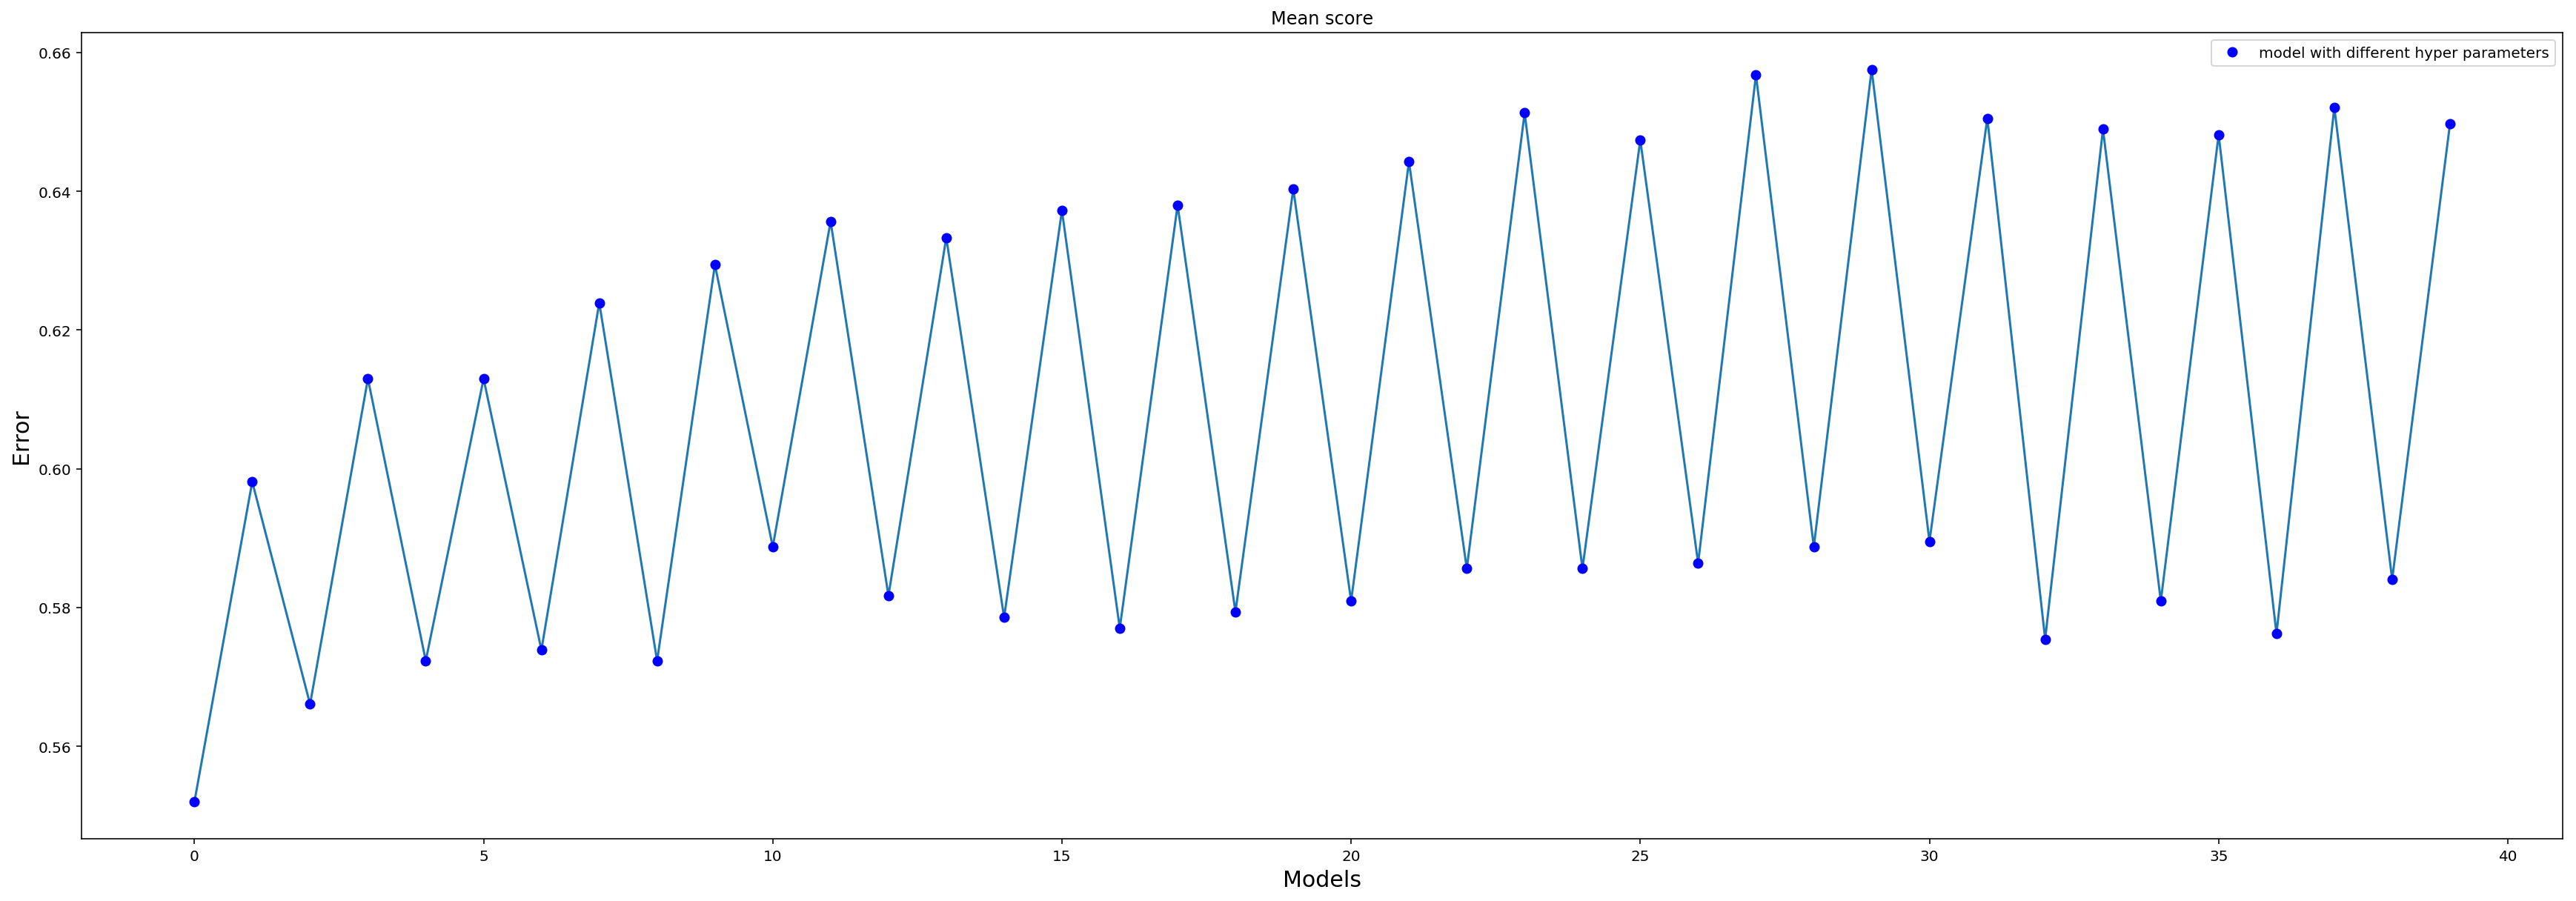

In [118]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNNBallTree.cv_results_["mean_test_score"])
plt.plot(modelKNNBallTree.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

## Generating classification report for all best models

In [119]:
from sklearn.metrics import classification_report
print("KNN")
print(classification_report(yTest, modelKNN.predict(xTest)))

print("KNN KD Tree")
print(classification_report(yTest, modelKNNKDTree.predict(xTest)))

print("KNN Ball Tree")
print(classification_report(yTest, modelKNNBallTree.predict(xTest)))

KNN
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         7
          5       0.74      0.75      0.74       149
          6       0.57      0.68      0.62       117
          7       0.68      0.42      0.52        45
          8       0.00      0.00      0.00         1

avg / total       0.65      0.66      0.65       320

KNN KD Tree
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         7
          5       0.74      0.75      0.74       149
          6       0.57      0.68      0.62       117
          7       0.68      0.42      0.52        45
          8       0.00      0.00      0.00         1

avg / total       0.65      0.66      0.65       320

KNN Ball Tree
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
         

In [120]:
"""Checking best score"""
print(modelKNN.best_score_)
print(modelKNNKDTree.best_score_)
print(modelKNNBallTree.best_score_)

0.657544956998
0.657544956998
0.657544956998


In [121]:
%timeit modelKNN.predict(xTest)

100 loops, best of 3: 12.2 ms per loop


In [122]:
%timeit modelKNNKDTree.predict(xTest)

100 loops, best of 3: 14.7 ms per loop


In [123]:
%timeit modelKNNBallTree.predict(xTest)

100 loops, best of 3: 13.5 ms per loop


In [124]:
irisData = pd.read_csv(directoryPath+"/iris.data", names = ["sepalLength", 
                                                            "sepalWidth", "petalLength", "petalWidth", "target"])
irisData.head()

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
from sklearn import preprocessing


encoder = preprocessing.LabelEncoder()
irisData['target'] = encoder.fit_transform(irisData['target'])

In [126]:
xTrain, xTest, yTrain, yTest = train_test_split(irisData[["sepalLength","sepalWidth", 
                                                          "petalLength", "petalWidth"]], irisData['target'],
                                                test_size = 0.2)

print("Train set size " +str(len(xTrain)))
print("Test set size " +str(len(xTest)))

Train set size 120
Test set size 30


In [127]:
classificationPipeline = Pipeline([
    ("featureScaling", StandardScaler()),
    ("classification", KNeighborsClassifier())
])

parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["brute"]
    
}


modelKNN = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNN.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['brute'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [128]:
print("Best model " + str(modelKNN.grid_scores_))

Best model [mean: 0.97500, std: 0.02041, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 5}, mean: 0.97500, std: 0.02041, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 5}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 6}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 6}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'brute', 'classification__weights': 'uniform', 'classification__n_neighbors': 7}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'brute', 'classification__weights': 'distance', 'classification__n_neighbors': 7}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'brute', 'classification

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


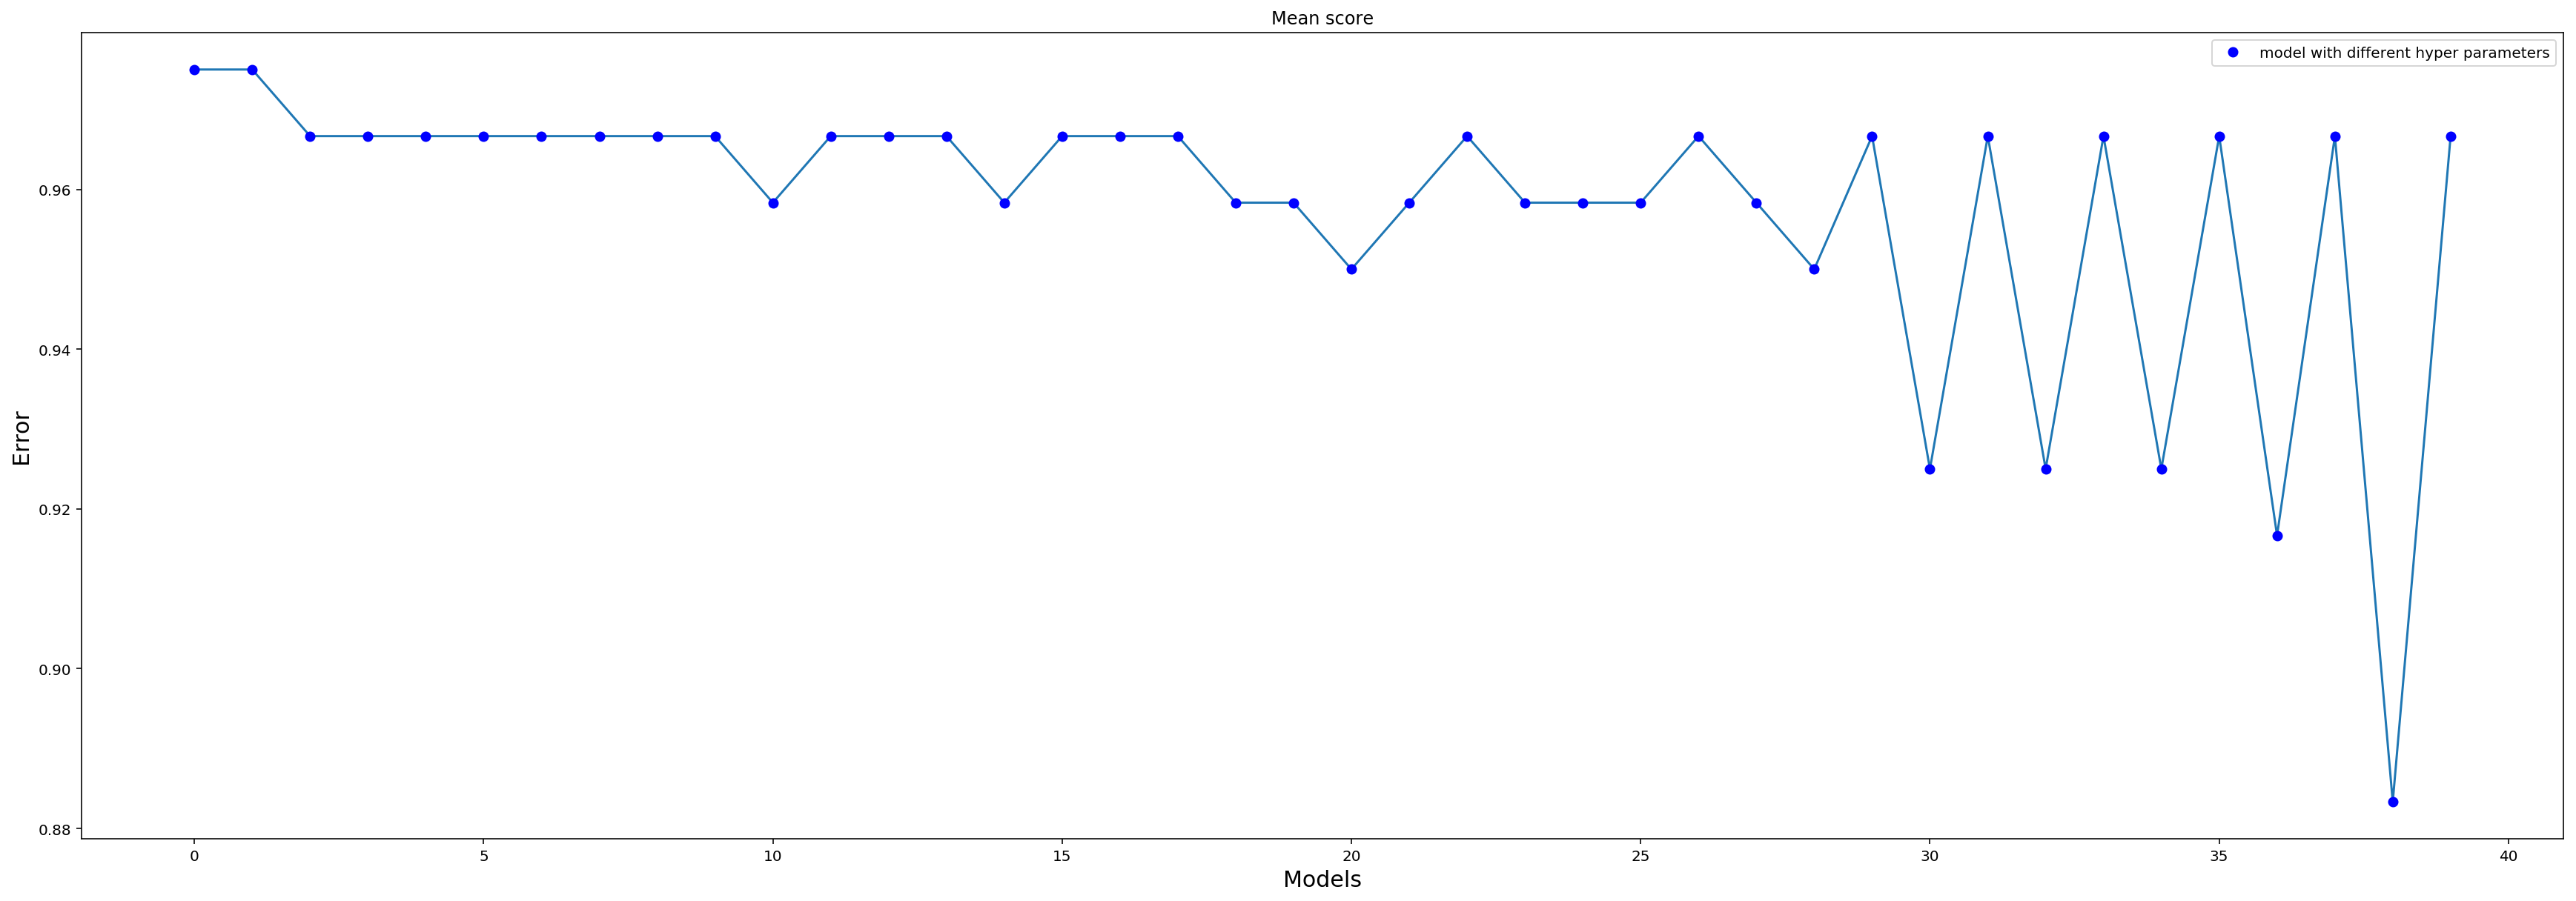

In [129]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNN.cv_results_["mean_test_score"])
plt.plot(modelKNN.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

In [130]:
parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["kd_tree"],
    "classification__leaf_size":[31]
}

In [131]:
modelKNNKDTree = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNNKDTree.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['kd_tree'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'classification__leaf_size': [31]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

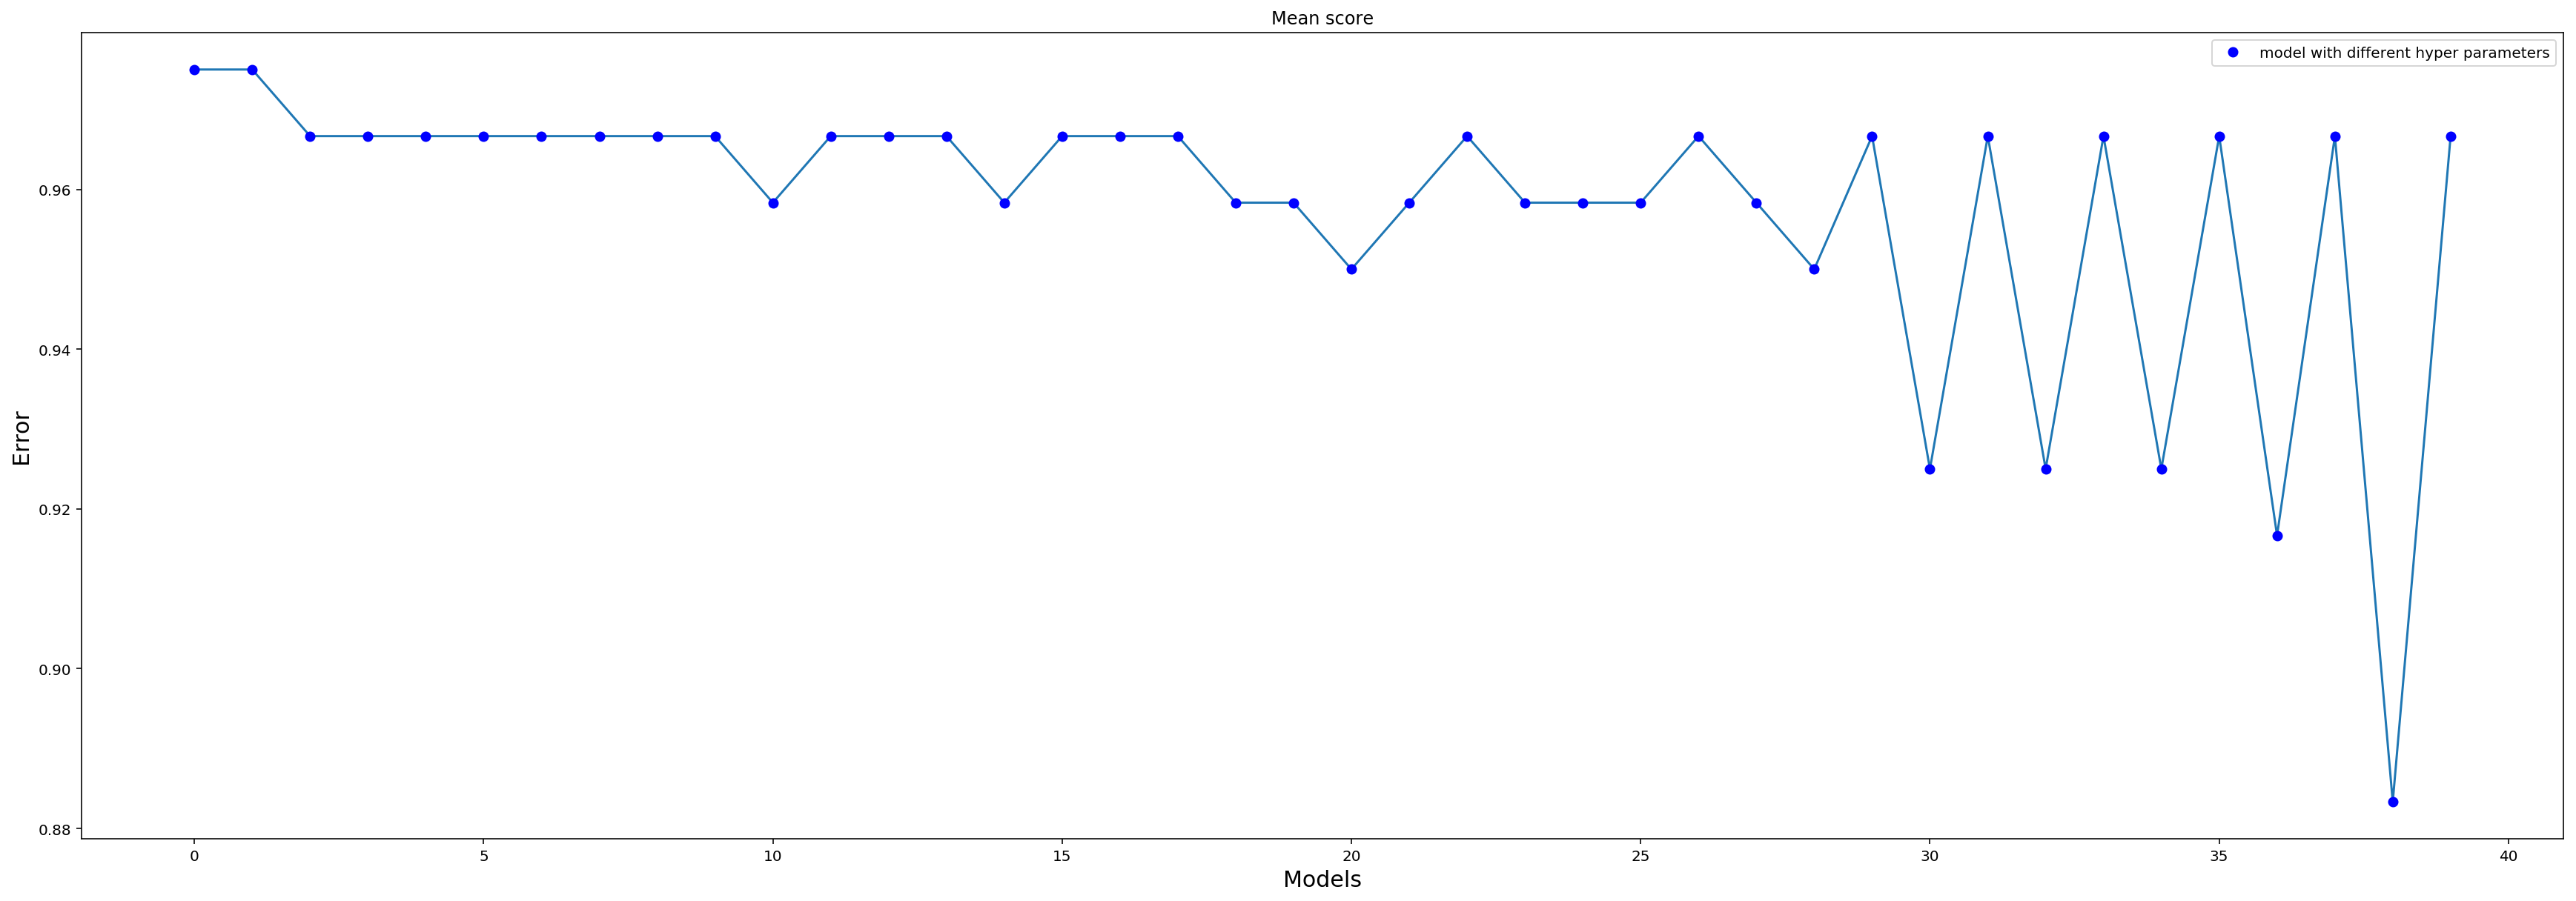

In [132]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNNKDTree.cv_results_["mean_test_score"])
plt.plot(modelKNNKDTree.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

In [133]:
parameterGrid = {
    "classification__n_neighbors":range(5,25),
    "classification__weights":["uniform", "distance"],
    "classification__algorithm":["ball_tree"],
    "classification__leaf_size":[31]
}

In [134]:
modelKNNBallTree = GridSearchCV(classificationPipeline, cv = 3, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelKNNBallTree.fit(xTrain * 1.0, yTrain * 1.0)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('featureScaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classification', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'classification__algorithm': ['ball_tree'], 'classification__weights': ['uniform', 'distance'], 'classification__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'classification__leaf_size': [31]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [135]:
print("Best model " + str(modelKNNBallTree.grid_scores_))

Best model [mean: 0.97500, std: 0.02041, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.97500, std: 0.02041, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 5}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'distance', 'classification__leaf_size': 31, 'classification__n_neighbors': 6}, mean: 0.96667, std: 0.02357, params: {'classification__algorithm': 'ball_tree', 'classification__weights': 'uniform', 'classification__leaf_size': 31, 'classification__n_neighbors': 7}, mean: 0.96667, std: 0.02357, params: {'classification__a

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


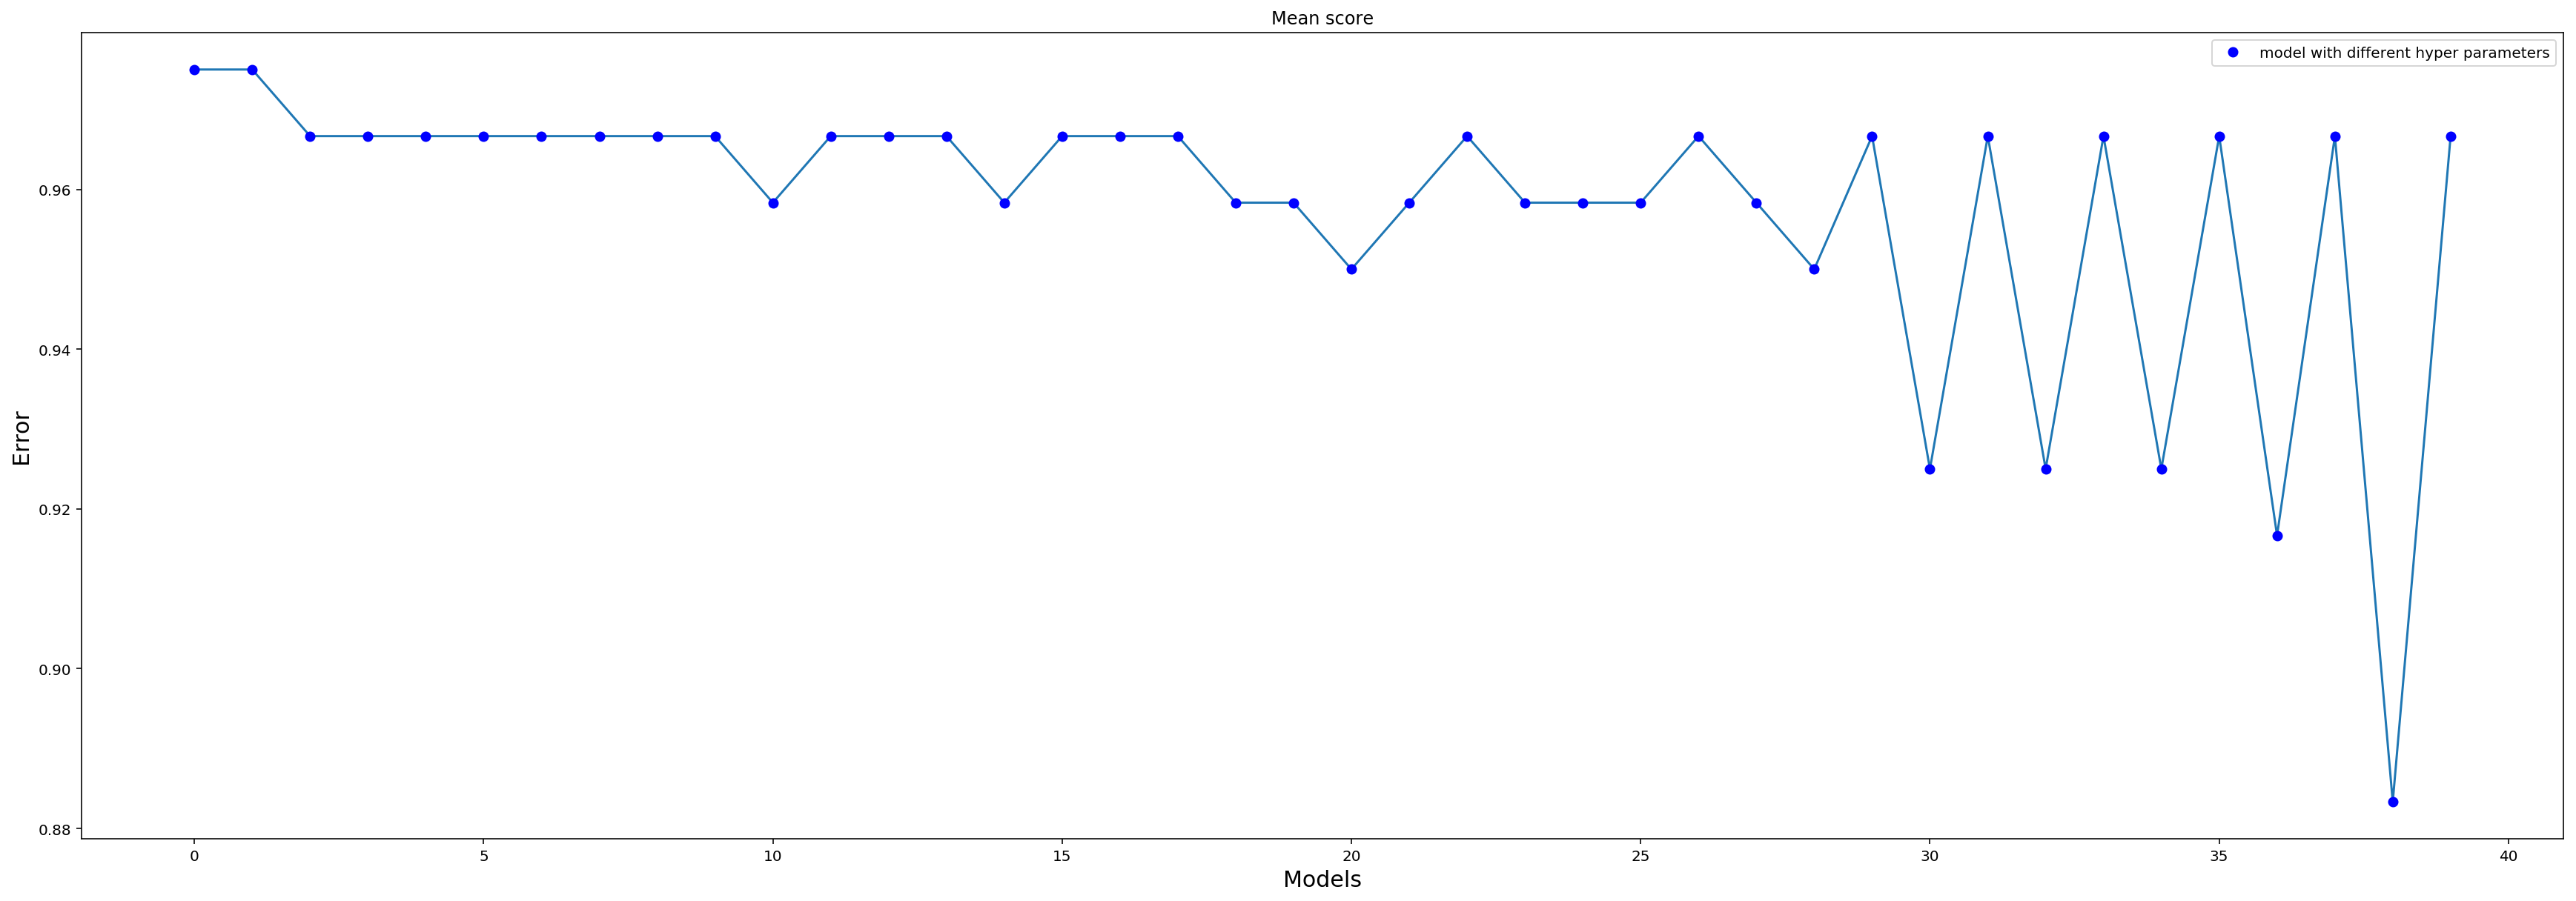

In [136]:
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(modelKNNBallTree.cv_results_["mean_test_score"])
plt.plot(modelKNNBallTree.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

In [137]:
print("KNN")
print(classification_report(yTest, modelKNN.predict(xTest)))

print("KNN KD Tree")
print(classification_report(yTest, modelKNNKDTree.predict(xTest)))

print("KNN Ball Tree")
print(classification_report(yTest, modelKNNBallTree.predict(xTest)))

KNN
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.75      0.86         8
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

KNN KD Tree
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.75      0.86         8
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

KNN Ball Tree
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.75      0.86         8
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



In [138]:
"""Checking best score"""
print(modelKNN.best_score_)
print(modelKNNKDTree.best_score_)
print(modelKNNBallTree.best_score_)

0.975
0.975
0.975


Here we can say that for both the data sets the best score remains same for brute force, KDTree and BallTree. There is same precison and recall for models. This is because KDTree and BallTree are space partitioning algorithms. They reduce the no of comparasions required for K-NN algorithm. Yet the core algorithm is same, hence the results are same. Both methods speed up discovery of neighbours

In [143]:
%timeit modelKNN.predict(xTest)

1000 loops, best of 3: 658 µs per loop


In [142]:
%timeit modelKNNKDTree.predict(xTest)

1000 loops, best of 3: 1.39 ms per loop


In [141]:
%timeit modelKNNBallTree.predict(xTest)

1000 loops, best of 3: 1.42 ms per loop
